# Fitting data to models

Parametric fitting involves finding coefficients (parameters) for one or more
models that you want to fit to some experimental data.

In general we assume data to be statistical in nature, this means that we can
assume it to be divided into two components:
```{math}
\text{``data''}\;=\;\text{``true value''}\;+\;\text{``statistical error''},
```
the other fundamental part is that we are assuming the deterministic component
to be given by a model for which the random component is described as an error
associated with the data:
```{math}
\text{``data''}\;=\;\text{``model''}\;+\;\text{``error''}.
```
The model is a function of the independent data (predictor) and one or more
coefficients, that are the quantities we want to compute. The error represents
random variations in the data. For doing a mathematical analysis one usually
assumes that they follow a specific probability distribution - in most of the
case Gaussian. The source of the error can be varied, but it is always present,
errors are bound to happen when you are dealing with measured data.

## Least square approach

To write down formally the idea we have discussed we can express a general
**nonlinear regression model** as
```{math}
Y_n = f(x_n, \theta) + Z_n,
```
where $f$ is the model we want to *fit*, $x_n$ is a vector of the associated
variable, $Y_n$ are the attained measurements, $\theta$ is a vector of
parameters defining the model, and $Z_n$ is the error term.

To be more practical and less formal, let us start with the tale of a certain
Count Rumford of Bavaria (see {cite}`MR1060528`). He was one of the early experimenters on the physics
of heat. In 1798 he performed the following experiment, he heated a cannon barrel
to a temperature of $130^\circ\,{\rm F}$ and then let it cool to the room
temperature of $60^\circ\,{\rm F}$ while taking measure of temperature at
different time intervals:
```{code} matlab
data = [ 4 126 % Time (min) and Temperature (°F)
  5 125
  7 123
  12 120
  14 119
  16 118
  20 116
  24 115
  28 114
  31 113
  34 112
  37.5 111
  41 110
]
```
To interpret these data we can use Newton's law of cooling, which states that
```{math}
\frac{\partial f}{\partial t} = - \theta(f-T_0),
```
where $T_0$ is the ambient temperature. This is one of the few differential
equations we actually know how to solve, and indeed we can express
```{math}
f(t,\theta) = T_0 + (T_f - T_0) e^{-\theta t} = 60 + 70 e^{-\theta t}.
```
This model now depends *nonlinearly* on just one parameter $\theta$ that is
the one that we have to fit to our data. Mathematically this means that we
want to find $\theta$ such that
```{math}
  \min \sum_{j=1}^{\text{# of data}}|f(t_j,\theta) - T_j|^2,
```
that is we want to solve a **least square** problem. Typically, together with
the previous *objective function* we have also some *constraints* on the
parameters. For example in this case we may want to impose the constraint of
having $\theta > 0$.

To solve these type of problems MATLAB offers a function called `fit`. Let us
look at its usage:
```{code} matlab
fo = fitoptions('Method','NonlinearLeastSquares',...
               'Lower',[0],...
               'Upper',[Inf],...
               'StartPoint',[1]);
ft = fittype('60 + 70*exp(-a*x)','options',fo);
[curve,gof] = fit(data(:,1),data(:,2),ft);
```
1. First we have set up some options for the `fit` function:
- in the `'Method'` field we have selected the `'NonlinearLeastSquares'`
  options. This tells MATLAB that we want to solve the problem in the
  mathematical formulation given above.
- The `'Lower'` and `'Upper'` keywords denote the bound on the parameters in
  the order in which they appear in the model. In our case we have just one
  parameter $\theta$ so we request that `0 \leq \theta \leq \infty`, that is
  $\theta \geq 0$.
- Finally, with the keyword `'StartPoint'` we tell the algorithm what is the
  starting point of the *iterative procedure* producing the solution. **Having
  good starting points for the parameters could be crucial!**.
2. Then we fix the model we want to fit, the variable is always denote as `x`
while the other letters appearing in the expression are interpreted as
the parameters
3. We finally launch the *fit* operation with the command of the same name by
passing to it the data and the model we have defined.

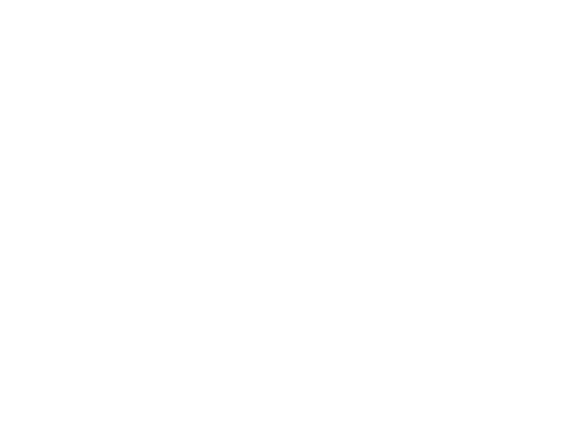

In [1]:
% Array containing the data
data = [ 4 126 % Time (min) and Temperature (°F)
  5 125
  7 123
  12 120
  14 119
  16 118
  20 116
  24 115
  28 114
  31 113
  34 112
  37.5 111
  41 110
];
fo = fitoptions('Method','NonlinearLeastSquares',...
               'Lower',[0],...
               'Upper',[Inf],...
               'StartPoint',[1]);
ft = fittype('60 + 70*exp(-a*x)','options',fo);
[curve,gof] = fit(data(:,1),data(:,2),ft);
% We plot the results
figure(1)
plot(curve,data(:,1),data(:,2))
xlabel('Time (m)');
ylabel('Temperature (°F)');

The other information we can extract from the fit are contained in the two
outputs of the `fit` function, namely:

In [2]:
disp(curve)
disp(gof)

     General model:
     curve(x) = 60 + 70*exp(-a*x)


     Coefficients (with 95% confidence bounds):
       a =    0.009416  (0.0085, 0.01033)


           sse: 44.1558
       rsquare: 0.8682
           dfe: 12
    adjrsquare: 0.8682
          rmse: 1.9182



::::{exercise} Puromycin
We use some data on the "velocity" of an enzymatic reaction. Specifically we
have measured the number of counts per minute of radioactive product from the
reaction as a function of substrate concentration in parts per million (ppm).
From these counts the initial rate, or "velocity", of the reaction was
calculated ($\text{counts}/\text{min}^2$). The experiment was conducted once
with the enzyme treated with Puromycin and once with the untreated enzyme.

The *velocity* is assumed to depend on the substrate concentration according to
the Michaelis-Menten, i.e.,
```{math}
f(x,\theta) = \frac{\theta_1 x}{\theta_2 + x},
```
we want to
1. Compute the parameters $\theta_1$ and $\theta_2$ in the two cases (with and
  without using Puromycin),
2. Verify the hypothesis on the fact that the ultimate velocity parameter
  $\theta_1$ should be affected by the introduction of the Puromycin, but not
  the half-velocity parameter $\theta_2$.

```{code} matlab
data = [ % substrate treated untreated
  0.02 76 67
  0.02 47 51
  0.06 97 84
  0.06 107 86
  0.11 123 98
  0.11 139 115
  0.22 159 131
  0.22 152 124
  0.56 191 144
  0.56 201 158
  1.10 207 160
  1.10 200 NaN   
 ]
```
::::

::::{exercise} Growth of leaves
Try to find parameters for the Richards model for the growth of leaves, i.e.,
```{math}
f(x,\theta) = \frac{\theta_1}{(1+ \theta_2 e^{-\theta_3 x})^{1/\theta4}},
```
on the following data
```{code} matlab
data = [ % Time (days) Leaf length (cm)
  0.5 1.3
  1.5 1.3
  2.5 1.9
  3.5 3.4
  4.5 5.3
  5.5 7.1
  6.5 10.6
  7.5 16.0
  8.5 16.4
  9.5 18.3
  10.5 20.9
  11.5 20.5
  12.5 21.3
  13.5 21.2
  14.5 20.9
]
```
::::

## Fitting data to a differential model

Until now we have always assumed to explicitly know the model. Nevertheless,
such models often come as the solution of a differential equation. As we have
hinted in the last topic, an explicit solution of a differential equation is
usually hard to come by.

We could be in the case of having a problem of the form
```{math}
x' = f(x,\theta), \quad x \in \mathbb{R}^d, \; t \in [0,t_{\max}], \quad x(0) = x_0,
```
depending on a set of parameters $\theta in \mathbb{R}^m$. Then we have
observations at discrete time points $t_1,\ldots,t_p \in [0,t_{\max}]$ in the
form
```{math}
(t_1,g(x^{(1)})), (t_2,g(x^{(2)})), \ldots, (t_p,g(x^{(p)})),
```
for a function $g(\cdot)$ representing some observable of the system. We can
state this problem again in a **least square** formulation as
```{math}
\text{ find }\theta \in \mathbb{R}^m \,:\, \min \sum_{i=1}^{p} \| g(x(t_i,\theta)) - g(x^{(i)}) \|^2,
```
where $\|g(x)-g(y)\| = \sum_{i=1}^{n} |g_i(x) - g_i(y)|^2$. Thus, by manipulating
a bit the quantities we have, we can use again the same strategy we have seen
before.

Let us use this procedure to **estimate the parameters of a SIR model**. Let us
proceed step-by-step
- first of all we need the dynamic of the system, since we will work with
uncertain data, we will run this time all three differential equations

In [3]:
% We order the variables as y(t) = [S(t),I(t)]
% lambda = theta(1) gamma = theta(2)
sirModel = @(t,y,theta) [-theta(1)*y(1)*y(2); ...
    theta(1)*y(1)*y(2)-theta(2)*y(2);...
    theta(2)*y(2)];

- then we use the function we have seen in the last topic for integrating
differential equations, this will be our workhorse, here we are using the
computational resources

In [4]:
sirSOL = @(theta,IC,t) deval(ode45( @(t,y) sirModel(t,y,theta),t,IC),t);

- now we generate our noisy data, that will represent the measurements taken
on the field

In [5]:
% we fix the random number generator so that we generate always the same random numbers:
rng(10);
numpts=20;
tdata = [0, sort(20*rand (1,numpts))];
width = 0.1;
ndataSIR = 20*[0, normrnd(0,width,[1,numpts]);
    0, normrnd(0,width,[1,numpts]);
    0, normrnd(0,width,[1,numpts])];

lambda = 0.01;
gamma = 0.1;
S0 = 50;
I0 = 1;
R0 = 0;
theta = [lambda; gamma];
IC = [S0; I0; R0];
SIRData = sirSOL(theta,IC,tdata) + ndataSIR;

- now the matrix `SIRData` contains the noisy data of our system with
given parameters (that are indeed the parameters that we will try to guess back).
To march the optimization procedure we will focus only on the data for
for $I(t)$ and $N(t)$

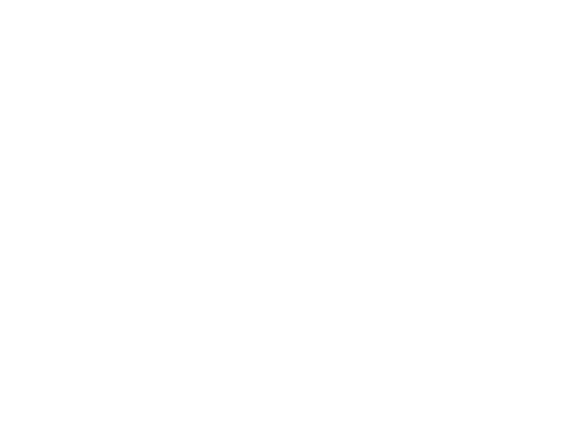

In [6]:
SIRDatared = [0 1 0; 1 1 1]*SIRData;

% Let us look at the data we have obtained
figure(1)
plot(tdata,SIRDatared(1,:),'*',tdata,SIRDatared(2,:),'x')
xlabel('t')
legend('I^*(t)','S^*(t) + I^*(t) + R^*(t)')

- We can now build the **objective** function we wish to optimize

In [7]:
SIRthetaSol = @(theta,t) [0 1 0;1 1 1]*sirSOL([theta(1) theta(2)],IC,t);
objective = @(theta) sum(sum( (SIRthetaSol(theta,tdata) - SIRDatared).^2 ));

- that we optimize by means of the `fmincon` function. Moreover, we tell to it
to print some information on the procedure, and we request that the parameters
$\lambda$ and $\gamma$ to be in between $[0,0]$ and $[1,4]$ respectively.

In [8]:
options = optimset('Display','iter');
[SIRtheta, fval, exitflag] = ...
    fmincon(objective,[0.1 4],[],[],[],[],[0 0],[1 4],[],options);

Initial point X0 is not between bounds LB and UB; 
FMINCON shifted X0 to strictly satisfy the bounds.



                                            First-order      Norm of

 Iter F-count            f(x)  Feasibility   optimality         step

    0       3    7.527718e+03    0.000e+00    3.951e+01


    1       6    7.516116e+03    0.000e+00    1.819e+03    9.864e-01

    2       9    7.516075e+03    0.000e+00    6.074e+01    8.219e-04

    3      12    7.515294e+03    0.000e+00    1.149e+02    1.059e-02

    4      15    7.508059e+03    0.000e+00    5.941e+02    2.065e-02

    5      25    7.506838e+03    0.000e+00    1.392e+01    2.104e-02

    6      28    7.503699e+03    0.000e+00    4.009e+02    9.717e-03

    7      31    7.502020e+03    0.000e+00    4.160e+02    1.542e-01

    8      34    6.257635e+03    0.000e+00    2.477e+05    3.827e+00

    9      40    5.486048e+03    0.000e+00    5.992e+04    4.682e-01

   10      50    5.364982e+03    0.000e+00    9.336e+04    1.793e-02

   11      53    2.821310e+03    0.000e+00    1.527e+06    4.628e-01

   12      58    1.174280e+03    0.000e+00    1.647e+04    1.735e-03

   13      61    1.089969e+03    0.000e+00    3.271e+05    1.275e-02

   14      64    3.673265e+02    0.000e+00    7.934e+03    6.099e-02

   15      75    2.999335e+02    0.000e+00    4.166e+03    2.358e-02

   16      78    2.935125e+02    0.000e+00    1.041e+04    5.328e-03

   17      81    2.934616e+02    0.000e+00    9.851e+03    5.052e-05

   18      84    2.932380e+02    0.000e+00    7.123e+03    2.771e-05

   19      87    2.929818e+02    0.000e+00    2.525e+02    1.504e-04

   20      90    2.929815e+02    0.000e+00    6.330e+00    1.030e-05

   21      93    2.929815e+02    0.000e+00    1.325e-02    3.758e-07


Local minimum possible. Constraints satisfied.

fmincon stopped because the size of the current step is less than
the value of the step size tolerance and constraints are 
satisfied to within the value of the constraint tolerance.



- In the final step we can print the results we have obtained to screen:

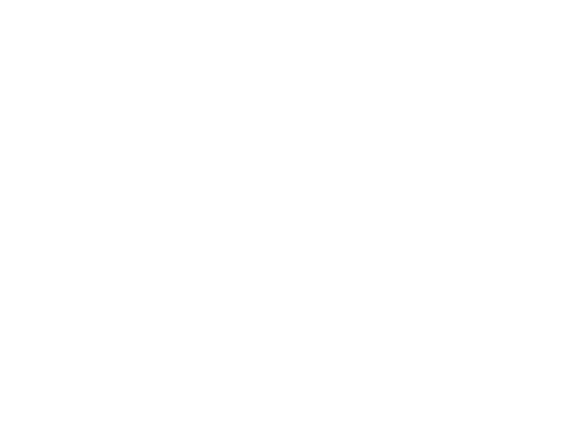

In [9]:
tsol = linspace(0,max(tdata),400);
SIRSOL = sirSOL(SIRtheta,IC,tsol);

figure(1)
plot(tdata,SIRData(1,:),'b*',...
    tdata,SIRData(2,:),'rx',...
    tdata,SIRData(3,:),'g^',...
    tdata,sum(SIRData),'k.',...
    tsol,SIRSOL(1,:),'b-',tsol,SIRSOL(2,:),'r-',tsol,SIRSOL(3,:),'g-',...
    tsol,sum(SIRSOL),'k--');
xlabel('t')
legend({'S^*(t)','I^*(t)','R^*(t)','N^*(t)',...
    'S(t)','I(t)','R(t)','N'},'Location','eastoutside')
axis tight

## Bibliography

```{bibliography}
:filter: docname in docnames
```